In [72]:
# importing libraries 

import pandas as pd
import csv
import re
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import openpyxl

In [53]:
excel_file = pd.ExcelFile('Data/Week4/customers.xlsx')
sheet_names = excel_file.sheet_names
df = pd.DataFrame()

for sheet_name in sheet_names:
    sheet_data = excel_file.parse(sheet_name)
    sheet_data['Month'] = sheet_name  # Create a new column with the sheet name (month name)
    df = pd.concat([df, sheet_data], ignore_index=True)

df.reset_index(drop=True, inplace=True)

In [58]:
#droping unnecessary columns 

df.drop(columns=['Demographiic', 'Demagraphic'], inplace=True)
df

,ID,Joining Day,Demographic,Value,Month
0,490910,3,Ethnicity,White,January
1,490910,3,Date of Birth,5/23/1981,January
2,490910,3,Account Type,Basic,January
3,369221,18,Ethnicity,Black,January
4,369221,18,Date of Birth,3/4/2019,January
...,...,...,...,...,...
2965,174699,2,Date of Birth,3/13/1989,December
2966,174699,2,Account Type,Gold,December
2967,514598,28,Ethnicity,Other,December
2968,514598,28,Date of Birth,10/10/1971,December


In [59]:
reshaped_data = df.pivot_table(index='ID', columns='Demographic', values='Value', aggfunc=lambda x: ', '.join(x))

# Reset the index
reshaped_data.reset_index(inplace=True)
reshaped_data


Demographic,ID,Account Type,Date of Birth,Ethnicity
0,100185,Basic,7/29/1952,Asian
1,101515,Gold,8/11/1974,Black
2,102704,Basic,3/9/2000,Black
3,104185,Basic,6/8/1989,White
4,111490,Basic,3/1/1946,Black
...,...,...,...,...
806,994016,Platinum,3/29/1955,Other
807,994289,Gold,5/9/1990,White
808,994611,Basic,6/19/1994,Black
809,995456,Basic,3/5/1975,Other


In [60]:
print(reshaped_data)
print(df)

Demographic      ID Account Type Date of Birth Ethnicity
0            100185        Basic     7/29/1952     Asian
1            101515         Gold     8/11/1974     Black
2            102704        Basic      3/9/2000     Black
3            104185        Basic      6/8/1989     White
4            111490        Basic      3/1/1946     Black
..              ...          ...           ...       ...
806          994016     Platinum     3/29/1955     Other
807          994289         Gold      5/9/1990     White
808          994611        Basic     6/19/1994     Black
809          995456        Basic      3/5/1975     Other
810          997703     Platinum      1/7/1998     Other

[811 rows x 4 columns]
          ID  Joining Day    Demographic       Value     Month
0     490910            3      Ethnicity       White   January
1     490910            3  Date of Birth   5/23/1981   January
2     490910            3   Account Type       Basic   January
3     369221           18      Ethnicity

In [64]:
df = reshaped_data.merge(df[['ID', 'Joining Day', 'Month']], on='ID', how='left')

,ID,Account Type,Date of Birth,Ethnicity,Joining Day,Month
0,100185,Basic,7/29/1952,Asian,20,May
1,100185,Basic,7/29/1952,Asian,20,May
2,100185,Basic,7/29/1952,Asian,20,May
3,101515,Gold,8/11/1974,Black,14,April
4,101515,Gold,8/11/1974,Black,14,April
...,...,...,...,...,...,...
2431,995456,Basic,3/5/1975,Other,17,February
2432,995456,Basic,3/5/1975,Other,17,February
2433,997703,Platinum,1/7/1998,Other,19,September
2434,997703,Platinum,1/7/1998,Other,19,September


Text(0.5, 1.0, 'Ethnicity Distribution')

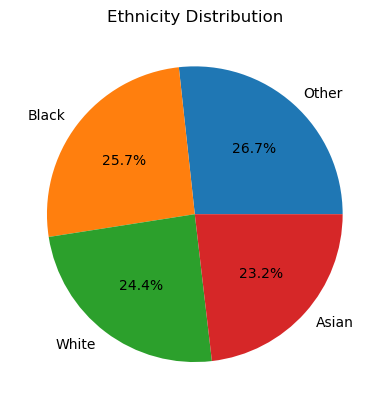

In [76]:
# Replace duplicate or inconsistent values in 'Account Type' column
df['Ethnicity'].replace({'White, White': 'White'}, inplace=True)

# Count the frequency of each ethnicity
ethnicity_counts = df['Ethnicity'].value_counts()

# Plot the pie chart
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Ethnicity Distribution')

([<matplotlib.patches.Wedge at 0x7fd5b8d16100>,
 [Text(0.4580120272566894, 1.000112485117658, 'Basic'),
  Text(-1.0794819644432605, -0.2114679371482104, 'Gold'),
  Text(0.6417340427869925, -0.8934077559145447, 'Platinum')],
 [Text(0.24982474214001235, 0.545515900973268, '36.3%'),
  Text(-0.5888083442417784, -0.11534614753538748, '33.5%'),
  Text(0.3500367506110868, -0.48731332140793343, '30.2%')])

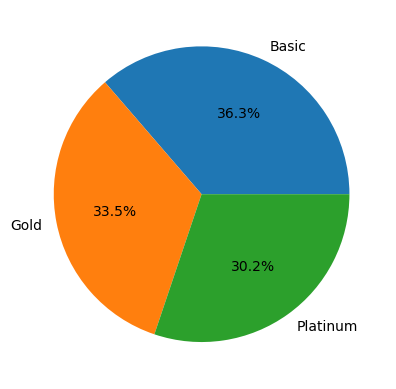

In [77]:
# Replace duplicate or inconsistent values in 'Account Type' column
df['Account Type'].replace({'Basic, Basic': 'Basic'}, inplace=True)

# account types

acc_type = df['Account Type'].value_counts()

plt.pie(acc_type, labels=acc_type.index, autopct='%1.1f%%')

In [85]:
# Which day of the month is the most popular among 
# Which month is the most popular
# Grouped data by Gold, Platinum and Basic account types
# Grouped data by ethnicities

